[View in Colaboratory](https://colab.research.google.com/github/nilchat/dengue_prediction/blob/master/Dengue_prediction.ipynb)

## Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name, the value is the data which was uploaded.

In [0]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

## Import dependencies

In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
#Common Model Algorithms
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor

%matplotlib inline

## Import data

In [0]:
# Import train and test data
dengue_features_train = pd.read_csv("dengue_features_train.csv")
dengue_features_test = pd.read_csv("dengue_features_test.csv")
dengue_label_train = pd.read_csv("dengue_labels_train.csv")
submission_format = pd.read_csv("submission_format.csv")

In [248]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [249]:
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [250]:
dengue_label_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


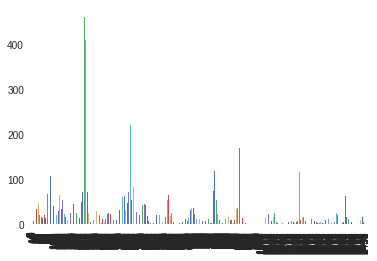

In [251]:
dengue_label_train["total_cases"].plot.bar()

In [252]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


## Data Exploration

In [253]:
print(dengue_features_train.shape)
print(dengue_features_test.shape)
print(dengue_label_train.shape)

(1456, 24)
(416, 24)
(1456, 4)


In [254]:
dengue_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [255]:
dengue_features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [256]:
pd.set_option("display.max_columns", 50)
dengue_features_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [257]:
dengue_features_train.describe(include="O")

,city,week_start_date
count,1456,1456
unique,2,1049
top,sj,2006-09-03
freq,936,2


In [258]:
dengue_features_test.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,303.623430,295.743478,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,3.101817,2.761109,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,298.200000,286.200000,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,301.425000,293.500000,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,302.750000,296.300000,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,305.800000,298.275000,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,314.100000,299.700000,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


In [259]:
dengue_features_test.describe(include="O")

,city,week_start_date
count,416,416
unique,2,269
top,sj,2013-02-26
freq,260,2


## Data preprocessing

In [0]:
n_rows_train, n_features_train = dengue_features_train.shape
n_rows_test, n_features_test = dengue_features_test.shape

# Combine training and test set

train_test_combine = pd.concat([dengue_features_train, dengue_features_test])

In [0]:
# Update data type for the d\week_start_date
train_test_combine["week_start_date_modified"] = pd.to_datetime(train_test_combine["week_start_date"])
train_test_combine.drop(columns=["week_start_date"], axis=1, inplace=True)

In [0]:
# Add a new feature for week of year
train_test_combine["Month"]=train_test_combine.week_start_date_modified.dt.month
train_test_combine.drop(columns=["week_start_date_modified"], axis=1, inplace=True)

In [0]:
# Handling missing values
missing_col_num = [col for col in train_test_combine.select_dtypes(include=np.number).columns if train_test_combine[col].isnull().any()]
# missing_col_obj = [col for col in train_test_combine.select_dtypes(include="O").columns if train_test_combine[col].isnull().any()] -- no missing object column

for col in missing_col_num:
    train_test_combine[col].fillna(value= train_test_combine[col].mean(), inplace= True)

In [0]:
# Handling categorical data
train_test_combine = pd.get_dummies(train_test_combine, columns=['city'])

In [265]:
train_test_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 25 columns):
year                                     1872 non-null int64
weekofyear                               1872 non-null int64
ndvi_ne                                  1872 non-null float64
ndvi_nw                                  1872 non-null float64
ndvi_se                                  1872 non-null float64
ndvi_sw                                  1872 non-null float64
precipitation_amt_mm                     1872 non-null float64
reanalysis_air_temp_k                    1872 non-null float64
reanalysis_avg_temp_k                    1872 non-null float64
reanalysis_dew_point_temp_k              1872 non-null float64
reanalysis_max_air_temp_k                1872 non-null float64
reanalysis_min_air_temp_k                1872 non-null float64
reanalysis_precip_amt_kg_per_m2          1872 non-null float64
reanalysis_relative_humidity_percent     1872 non-null float64
reanalysis_sat_p

In [266]:
# scaler = StandardScaler()
# train_test_combine_scaled = scaler.fit_transform(train_test_combine)
# train_test_combine_scaled

array([[-2.09757491, -0.56586724, -0.11687837, ..., -0.70076366,
        -0.75180941,  0.75180941],
       [-2.09757491, -0.49921084,  0.2289076 , ..., -0.41092062,
        -0.75180941,  0.75180941],
       [-2.09757491, -0.43255445, -0.77738075, ..., -0.41092062,
        -0.75180941,  0.75180941],
       ...,
       [ 1.55868133, -0.16592885,  0.73207808, ..., -0.12107759,
         1.33012434, -1.33012434],
       [ 1.55868133, -0.09927246,  1.2562399 , ..., -0.12107759,
         1.33012434, -1.33012434],
       [ 1.55868133, -0.03261606,  1.46852251, ..., -0.12107759,
         1.33012434, -1.33012434]])

In [274]:
X_train_preprocessed = train_test_combine[:n_rows_train]
y_train = dengue_label_train.total_cases
X_test_preprocessed = train_test_combine[n_rows_train:]
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)

(1456, 25)
(416, 25)


## Data modelling

In [0]:
# Split into train and validation set
X_t, X_val, y_t, y_val = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=1)

In [0]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    
    #GLM
    LinearRegression(),
    SGDRegressor(),
    
    #Nearest Neighbor
    KNeighborsRegressor(),
    
    #SVM
    SVR(),
    LinearSVR(),
    
    #Trees    
    DecisionTreeRegressor(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBRegressor()    
    ]

In [270]:
matrix = pd.DataFrame(columns=["Algorithm Name", "MAE"])
row_index = 0
for alg in MLA:
    matrix.loc[row_index, "Algorithm Name"] = alg.__class__.__name__
    model = alg
    model.fit(X_t, y_t)
    y_pred = model.predict(X_val)
    y_pred_int = np.int64(y_pred.round())
    error = mean_absolute_error(y_val, y_pred_int)
    matrix.loc[row_index, "MAE"] = error
    row_index = row_index+ 1
matrix.sort_values(by= 'MAE', ascending=True)    

,Algorithm Name,MAE
2,RandomForestRegressor,11.3664
1,GradientBoostingRegressor,11.5925
9,XGBRegressor,11.7842
8,DecisionTreeRegressor,13.4315
6,SVR,14.2226
7,LinearSVR,15.0171
5,KNeighborsRegressor,17.4247
3,LinearRegression,20.1096
4,SGDRegressor,20.8493
0,AdaBoostRegressor,33.589


In [271]:
# Create the final model best on the best model result
final_model = GradientBoostingRegressor()
final_model.fit(X_train_preprocessed, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [0]:
# Predict test data
y_test = final_model.predict(X_test_preprocessed)
y_test_int = np.int64(y_test.round())

In [0]:
# Create submission file
output = pd.DataFrame({"city": dengue_features_test.city,
                       "year": dengue_features_test.year,
                       "weekofyear": dengue_features_test.weekofyear,
                       "total_cases": y_test_int})
output.to_csv("submission_updated.csv", index= False, columns= ["city", "year", "weekofyear", "total_cases"])
files.download("submission_updated.csv")